---


# Simulating the Pricing based on Inventory model


---
Garmin model 

we start with a value of price $P_0$ and inventory Q, then the bid and ask prices are given by 

$$
P_b = P_0 - \frac{\gamma}{2} Q_t
$$ 
$$
P_a = P_0 + \frac{\gamma}{2} Q_t
$$ 

Now the buy and sell orders are uncorrelated and are sampled from a poisson distribution, with rates $\lambda_b$ and $\lambda_a$


In [75]:
import numpy as np 
import matplotlib.pyplot as plt
import random

def garmin_model(T,N,init_price, gamma, init_inv, delta_inv, bid_rate, ask_rate):
    dt = T/N
    ask_price = np.zeros(N+1)
    bid_price = np.zeros(N+1)
    inv_t = np.zeros(N+1)
    bid_price[0] = init_price
    ask_price[0] = init_price
    inv_t[0] = init_inv
    for t in range(N):
        U = np.random.uniform(0,1)
        if U<bid_rate:
            inv_t[t+1] = inv_t[t] + delta_inv
    
        elif U>ask_rate:
            inv_t[t+1] = inv_t[t]- delta_inv
            
        else: 
            inv_t[t+1] = inv_t[t]
        bid_price[t+1] = init_price - gamma/2*inv_t[t+1]
        ask_price[t+1] = init_price + gamma/2*inv_t[t+1]

    return inv_t,bid_price,ask_price




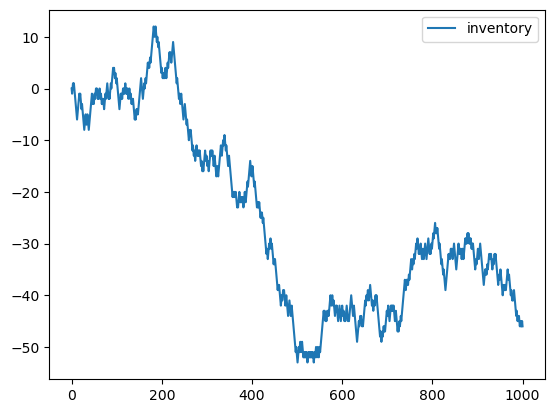

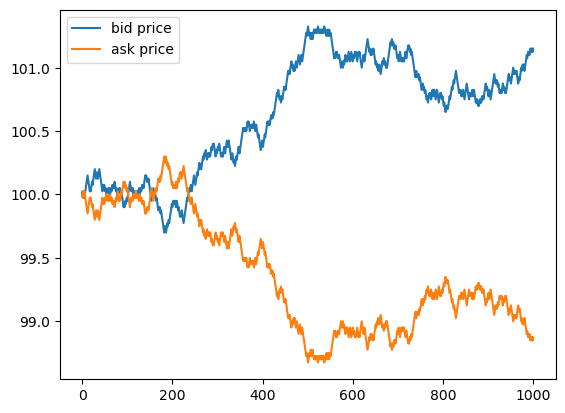

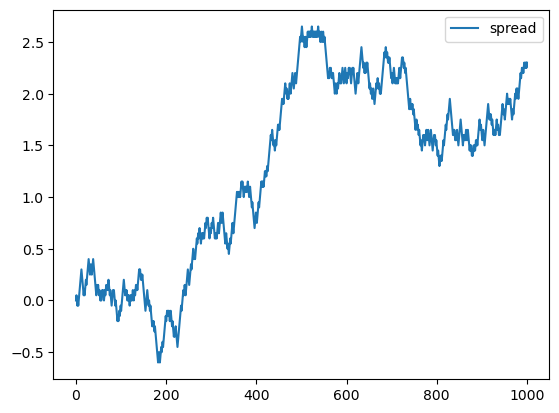

In [102]:
T = 1
N = 1000
init_price = 100
gamma = 0.05
init_inv = 0
delta_inv = 1 
bid_rate = 0.5
ask_rate = 0.5


inv_t,bid_price,ask_price = garmin_model(T,N,init_price, gamma, init_inv, delta_inv, bid_rate, ask_rate)

plt.plot(inv_t,label = 'inventory')
plt.legend()
plt.show()
plt.plot(bid_price,label = 'bid price')
plt.plot(ask_price,label = 'ask price')
plt.legend()
plt.show()
plt.plot(bid_price-ask_price, label = 'spread')
plt.legend()

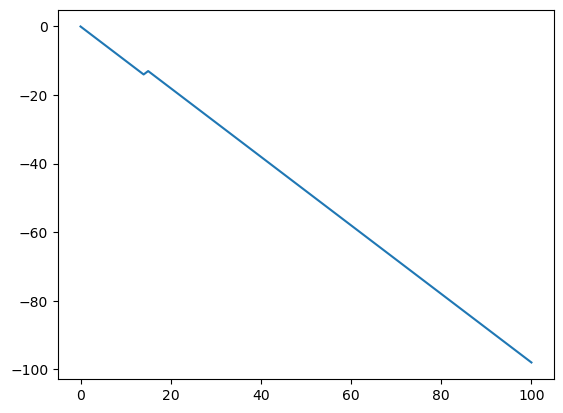

In [55]:
plt.plot(inv_t)

In [65]:
import numpy as np 
import matplotlib.pyplot as plt
import random


def simulate_garmon_paths(n_pathsl,T,N,init_price, gamma, init_inv, delta_inv, bid_rate, ask_rate):
    S_paths = []
    for j in range(n_paths):
        S = garmin_model(T,N,init_price, gamma, init_inv, delta_inv, bid_rate, ask_rate)
        S_paths.append(S)
    return S_paths


def mean_paths(S_path,S0):
     # Ensure S_path is a NumPy array
    S_path = np.array(S_path)
    
    # Calculate mean and variance at each time step across all paths
    mean_over_time = np.mean(S_path, axis=1)      # Mean across paths for each time step
    variance_over_time = np.var(S_path, axis=1)  # Variance across paths for each time step
    
    # Calculate overall mean across all time steps and paths
    S_m = np.mean(mean_over_time)
    S_var = np.mean(variance_over_time)             # Average variance across paths
    
    # Calculate relative statistics
    rel_S = (S_m - S0) / S0                    # Relative mean change
    rel_S_var = S_var / (S0**2)                # Relative variance
    return S_m, rel_S, mean_over_time, rel_S_var


The Empherical value::  0.15568037610714142
The mean of variance of each path ::  0.08696425919632227


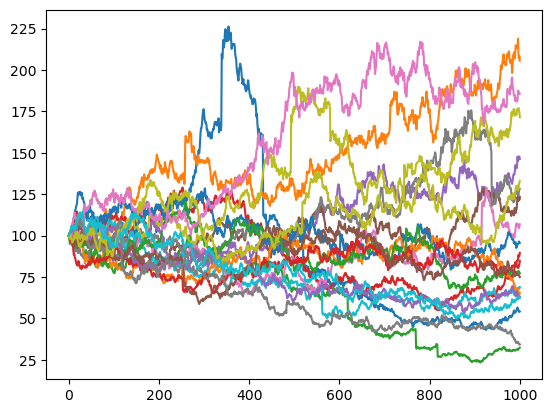

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Initial Parameters
S0 = 100          # Initial asset price
mu = 0.05         # Drift coefficient (5% annual return)
sigma = 0.20      # Volatility (20% annual)
lambda_jump = 0.3 # Jump intensity (0.1 jumps/year)
alpha = 0.0      # Mean of log jump sizes (-10%)
beta = 0.2        # Std dev of log jump sizes (20%)
n_paths = 4000

# Simulation Parameters
T = 5.0           # Total time in years
N = 1000           # Number of time steps (daily)
dt = T / N        # Time step size

S_path = simulate_j_m_path(n_paths,lambda_jump,alpha,beta,mu,sigma,T,N,S0)

S_m, rel_S, mean_over_time, rel_S_var = mean_paths(S_path,S0)
print("The Empherical value:: ",rel_S)
print("The mean of variance of each path :: ",rel_S_var)

for i in range(20):
    plt.plot(S_path[i])


In [58]:
def garmin_model(T, N, init_price, gamma, init_inv, delta_inv, bid_rate, ask_rate):
    dt = T / N
    ask_price = np.zeros(N + 1)
    bid_price = np.zeros(N + 1)
    inv_t = np.zeros(N + 1)

    # Initialize bid and ask prices based on initial inventory
    bid_price[0] = init_price - gamma / 2 * init_inv
    ask_price[0] = init_price + gamma / 2 * init_inv
    inv_t[0] = init_inv

    for t in range(N):
        U = np.random.uniform(0, 1)  # Random number for trade decision

        if U < bid_rate * dt:
            # Buy trade
            inv_t[t + 1] = inv_t[t] + delta_inv
        elif U > ask_rate * dt:
            # Sell trade
            inv_t[t + 1] = inv_t[t] - delta_inv
        else:
            # No trade
            inv_t[t + 1] = inv_t[t]

        # Update bid and ask prices based on new inventory
        bid_price[t + 1] = init_price - gamma / 2 * inv_t[t + 1]
        ask_price[t + 1] = init_price + gamma / 2 * inv_t[t + 1]

        # Print for debugging
        print(f"Step {t + 1}: Inventory = {inv_t[t + 1]}, Bid = {bid_price[t + 1]}, Ask = {ask_price[t + 1]}")

    return inv_t, bid_price, ask_price
